In [29]:
import numpy as np # for linear algebra
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.preprocessing import OneHotEncoder # for encoding data
from sklearn.model_selection import train_test_split # for splitting data set
from sklearn.linear_model import LogisticRegression # machine learning model used
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # model evaluation metrics

In [30]:
df = pd.read_csv('tested.csv') # read the data from the CSV file

### Exploratory Data Analysis

In [31]:
df.head() # displays rows from the top of the dataframe (default is 5 rows)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df.tail() # displays rows from the bottom of the dataframe (default is 5 rows)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [33]:
df.describe().round(3) # calculates statistical values and rounds them to 3 decimal places

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.000,418.000,332.000,418.000,418.000,417.000
mean,1100.50,0.364,2.266,30.273,0.447,0.392,35.627
std,120.81,0.482,0.842,14.181,0.897,0.981,55.908
min,892.00,0.000,1.000,0.170,0.000,0.000,0.000
25%,996.25,0.000,1.000,21.000,0.000,0.000,7.896
50%,1100.50,0.000,3.000,27.000,0.000,0.000,14.454
75%,1204.75,1.000,3.000,39.000,1.000,0.000,31.500
max,1309.00,1.000,3.000,76.000,8.000,9.000,512.329


In [11]:
df.isnull().sum() # mark null values as True and returns sum of number of True values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df.duplicated().sum() # shows number of duplicated entries in the dataframe

0

Initial impressions of the data set
1. There are 417 rows and 12 columns
2. There are null values in Age, Cabin and Fare columns
3. There are no duplicated rows

### Handling Null Values and performing some Pre-Processing

In [34]:
df['Age'].fillna(df['Age'].median(), inplace=True) # replaces null value with median value of the column
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Cabin'].fillna('unspecified', inplace=True) # replaces null value with 'unspecified'

In [35]:
# Categorizes values in Age column. This will help encoding it in the future
for i in df.index:
    if df['Age'][i] < 12:
        df['Age'][i] = 'Child'
    elif df['Age'][i] >= 12 and df['Age'][i] < 18:
        df['Age'][i] = 'Teenage'
    elif df['Age'][i] >= 18 and df['Age'][i] < 25:
        df['Age'][i] = 'Young Adult'
    elif df['Age'][i] >= 25 and df['Age'][i] < 45:
        df['Age'][i] = 'Adult'
    elif df['Age'][i] >= 45 and df['Age'][i] < 65:
        df['Age'][i] = 'Middle-Age'
    else:
        df['Age'][i] = 'Elderly'

C:\Users\shahe\AppData\Local\Temp\ipykernel_7216\1812205004.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 'Adult'


### Data Visualization

#### Correlation between Attributes

C:\Users\shahe\AppData\Local\Temp\ipykernel_7216\4032970761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True) # make the plot with all values rounded up to 2 decimal places and also all the values will be shown in each cell of the matrix


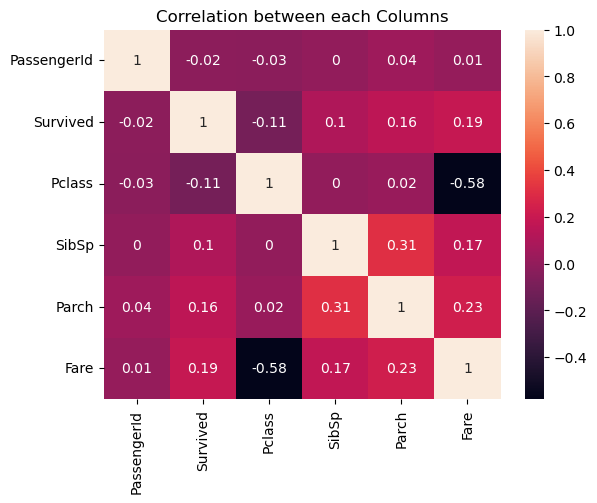

In [36]:
sns.heatmap(df.corr().round(2), annot=True) # make the plot with all values rounded up to 2 decimal places and also all the values will be shown in each cell of the matrix
plt.title('Correlation between each Columns') # title for the plot
plt.show()

#### Ratio of Male and Female passengers

<Axes: >

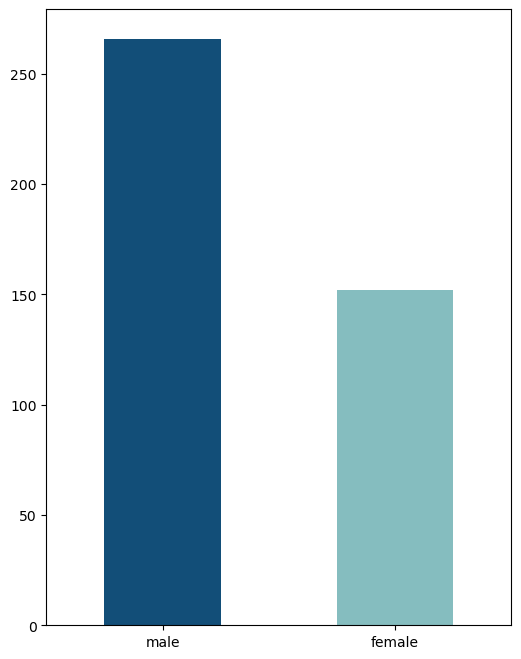

In [37]:
color = ['#124E78', '#85BDBF'] # colors for the plot
df['Sex'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0) # plot the bar chart to show ratio of Male and Female passengers

#### Ratio of passengers that Survived and did not Survived

<Axes: >

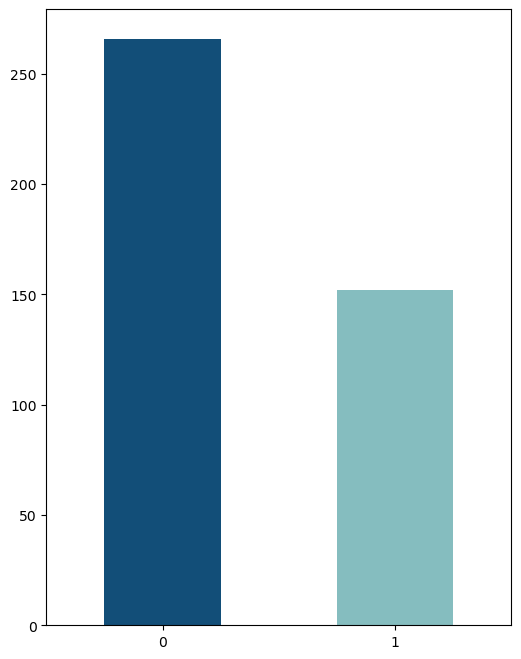

In [38]:
color = ['#124E78', '#85BDBF'] # color for the plot
df['Survived'].value_counts().plot.bar(figsize=(6,8), color=color, rot=0) # plot the bar graph to show ratio of passengers who survived and who didn't

#### Percentage of Values in Age

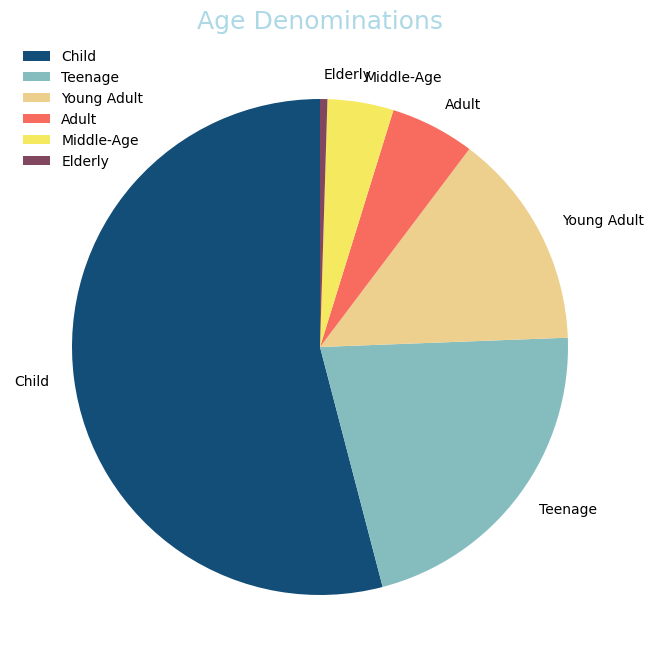

In [39]:
fig = plt.figure() # create a figure object
color = ['#124E78', '#85BDBF', '#EDCF8E', '#F76C5E', '#F5E960', '#80475E'] # colors for each age group
label = ['Child', 'Teenage', 'Young Adult', 'Adult', 'Middle-Age', 'Elderly'] #
plt.pie(df['Age'].value_counts(), colors=color, labels=label, startangle=90) # plot the pie chart
fig.patch.set_facecolor('white') # set the background color of the plot
fig.set_size_inches(8, 9) # set the size of the plot
plt.legend(edgecolor='white', frameon=False) # set the legend of the plot
plt.title('Age Denominations', fontsize=18, color='lightblue') # set the title of the plot
plt.show()

### Prepping the dataset for Training

#### Encoding the Data

In [40]:
# Encodes columns Age and Sex using One Hot Encoder
ohe_columns = ['Age', 'Sex']
ohe = OneHotEncoder(sparse=False).fit(df[ohe_columns])
encoded = ohe.transform(df[ohe_columns])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
df = pd.concat([df[[x for x in df.columns if x not in ohe_columns]].reset_index(drop=True),encoded_df], axis=1)

c:\Users\shahe\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Dropping unecessary Attributes

In [41]:
# Dropping unnecessary columns
df.drop(['PassengerId', 'Ticket', 'Name', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

### Training the Model

In [42]:
# Seperating Target column from the rest of the dataset
columns = [c for c in df.columns if c != 'Survived']
X = df[columns]
Y = df['Survived']

In [43]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [44]:
# Using Logistic Regression to classify people into suvivors and non-suvivors
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

### Evaluating the Model

In [45]:
# Evaluating the model through different evaluation metrics
accuracy = accuracy_score(Y_test, log.predict(X_test))
precision = precision_score(Y_test, log.predict(X_test))
recall = recall_score(Y_test, log.predict(X_test))
f1 = f1_score(Y_test, log.predict(X_test))
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))

In [46]:
# Showing the values
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[122   0]
 [  0  87]]
